In [1]:
import warnings
# warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [2]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import glob
import keras
import math
from sklearn.metrics import r2_score
from datetime import datetime
import time
# from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# from sklearn.metrics import r2_score
# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.stattools import pacf
%matplotlib inline
from matplotlib.pylab import rcParams
# import seaborn as sns
rcParams['figure.figsize']=15,5

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import math
from tensorflow.keras import datasets, layers, models
import keras.backend as K

In [3]:
# seed=1226 = 0.98
seed=1226

In [4]:
from time import time

import numpy as np
import pandas as pd


# For plotting
from matplotlib import offsetbox
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,7)})

#For standardising the dat
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.manifold import TSNE

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:

from keras.models import Sequential, load_model, save_model
from keras.layers import Dense,Input,Reshape, Flatten
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, Embedding, multiply
from keras.layers import LeakyReLU
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras import Input, Model
from tensorflow.keras import backend as K
import glob
import keras
from datetime import datetime
from keras.callbacks import EarlyStopping
import time
# from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
# from sklearn.metrics import r2_score

# Commented out IPython magic to ensure Python compatibility.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from scipy import stats
from keras.utils import to_categorical
# from statsmodels.tsa.stattools import adfuller
# from statsmodels.tsa.stattools import pacf
%matplotlib inline
from matplotlib.pylab import rcParams
# import seaborn as sns
rcParams['figure.figsize']=15,5




In [6]:
Stations = ['Data20Nov','Data23Nov2','Data23Nov1','Data24Nov','Data24Nov2','Data25Nov','Data29Nov','Data1Dec','Data2Dec','Data3Dec']

In [7]:
#Rearrange the Array
def makeArray(Array):
    New=np.array(Array[0])

    for i in range(1,len(Array)):
        New = np.append(New,Array[i],axis=0)
        
    return New

In [8]:
def readData(Stations):
    
    Data, C, E = [], [], []
    
#     print(Stations)
    file = Stations+'.csv'
    newfile = file
    df = pd.read_csv('dataset/'+newfile, header=0, index_col=None)
    print(newfile)
    df = df.reset_index(drop=True)
    data=df[['Present_AX','Present_Ay','Present_AZ']].values
    data=data.astype('float32')
#     data=data[:,0]**2+data[:,1]**2+data[:,2]**2
#     data=np.sqrt(data)
#     data=data.reshape((-1,1))
    count=df['Change'].values
    count=count.astype('float32')
    count=count.reshape((-1,1))
    
    count1=df['Corrected'].values
    count1=count1.astype('float32')
    count1=count1.reshape((-1,1))

#     #Normalize the data
#     scaler = MinMaxScaler(feature_range=(0, 1))
#     data = scaler.fit_transform(data)
    D=data[1:]-data[:-1]
    th=0.02
#     D[np.where((D[:,0]<th) & (D[:,0]>-th)),0]=0
#     D[np.where((D[:,1]<th) & (D[:,1]>-th)),1]=0
#     D[np.where((D[:,2]<th) & (D[:,2]>-th)),2]=0
#     print(D.shape)
    Data.append(D)
    C.append(count[1:])
    E.append(count1[1:])
           
    
        
    return makeArray(Data), makeArray(C), makeArray(E)



In [9]:
Data=[[] for x in range(len(Stations))]
Count=[[] for x in range(len(Stations))]
Count1=[[] for x in range(len(Stations))]
for i in range(len(Stations)):
    Data[i], Count[i], Count1[i] = readData(Stations[i])

Data20Nov.csv
Data23Nov2.csv
Data23Nov1.csv
Data24Nov.csv
Data24Nov2.csv
Data25Nov.csv
Data29Nov.csv
Data1Dec.csv
Data2Dec.csv
Data3Dec.csv


In [10]:
Data[0]=Data[0][22843:]
Data[1]=Data[1][35000:38000]
Data[2]=Data[2][1000:4000]
Data[3]=Data[3][6000:9000]
Data[4]=Data[4][13000:16000]
Data[5]=Data[5][4500:7500]
Data[6]=Data[6][13000:16000]
Data[7]=Data[7][160:]
Data[8]=Data[8][400:-166]

In [11]:
Count[0]=Count[0][22843:]
Count[1]=Count[1][35000:38000]
Count[2]=Count[2][1000:4000]
Count[3]=Count[3][6000:9000]
Count[4]=Count[4][13000:16000]
Count[5]=Count[5][4500:7500]
Count[6]=Count[6][13000:16000]
Count[7]=Count[7][160:]
Count[8]=Count[8][400:-166]

In [12]:
Count1[0]=Count1[0][22843:]
Count1[1]=Count1[1][35000:38000]
Count1[2]=Count1[2][1000:4000]
Count1[3]=Count1[3][6000:9000]
Count1[4]=Count1[4][13000:16000]
Count1[5]=Count1[5][4500:7500]
Count1[6]=Count1[6][13000:16000]
Count1[7]=Count1[7][160:]
Count1[8]=Count1[8][400:-166]

In [13]:
for i in range(10):
    print(Data[i].shape)

(3000, 3)
(3000, 3)
(3000, 3)
(3000, 3)
(3000, 3)
(3000, 3)
(3000, 3)
(3000, 3)
(3000, 3)
(3000, 3)


In [14]:
# for i in range(5000):
#     print(Data[9][i],Count[9][i])

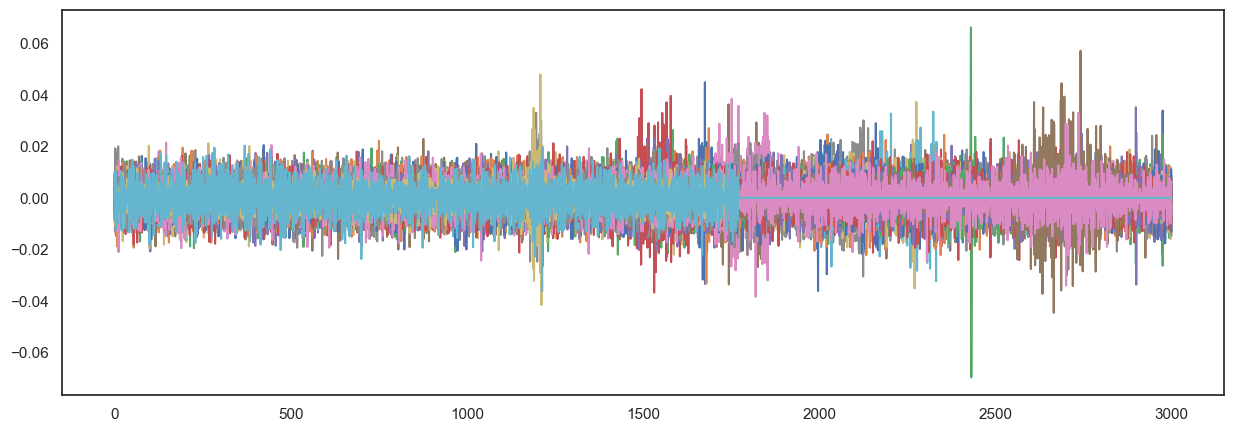

In [15]:
for i in range(10):
    plt.plot(Data[i])


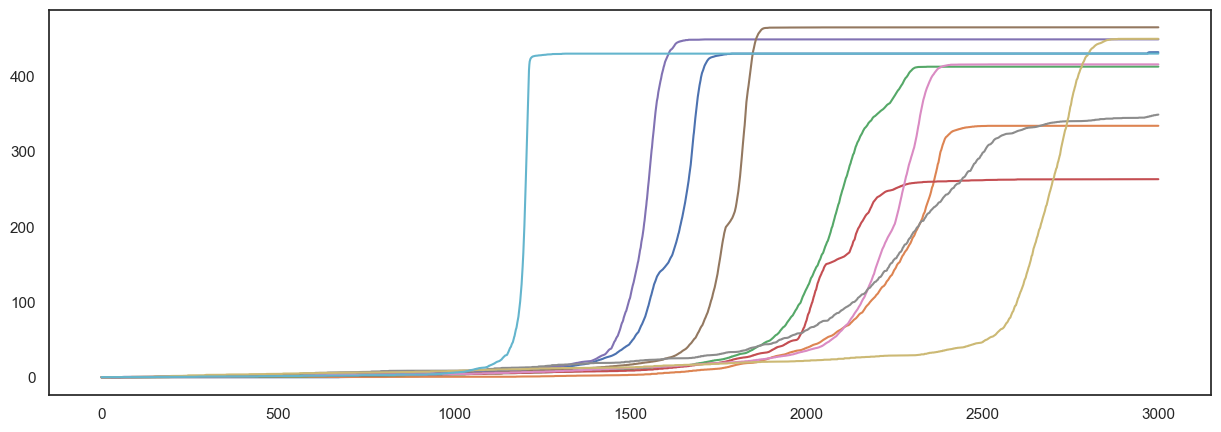

In [16]:
for i in range(10):
    plt.plot(np.cumsum(Count[i]))

In [17]:
def MA(arr,window_size):
    # Program to calculate moving average

    i = 0
    # Initialize an empty list to store moving averages
    moving_averages = []
    for j in range(window_size-1):
        moving_averages.append(arr[j])

    # Loop through the array to consider
    # every window of size 3
    while i < len(arr) - window_size + 1:

        # Store elements from i to i+window_size
        # in list to get the current window
        window = arr[i : i + window_size]

        # Calculate the average of current window
        window_average = np.round(sum(window) / window_size, 2)

        # Store the average of current
        # window in moving average list
        moving_averages.append(window_average)

        # Shift window to right by one position
        i += 1

    return np.array(moving_averages)

In [18]:
def makePacket(data,label,lag):
    D,L=[],[]
    length=len(data)
    for i in range(length-lag+1):
        D.append(data[i:lag+i,:])
#         S=label[lag+i-1]-label[i]
        L.append(label[i:lag+i,:])
        
    return np.array(D),np.array(L)
        
   

In [19]:
DD=np.zeros(10)
LL=np.zeros(10)
for i in range(10):
    DD[i]=i
    LL[i]=i
DD=DD.reshape((-1,1))   
LL=LL.reshape((-1,1))  

In [20]:
D,L=makePacket(Data[0],Count[0],3)

In [21]:
D.shape

(2998, 3, 3)

In [22]:
L.shape

(2998, 3, 1)

In [23]:
def positional_encoding(length, depth):
    depth = depth/2

    positions = np.arange(length)[:, np.newaxis]     # (seq, 1)
    depths = np.arange(depth)[np.newaxis, :]/depth   # (1, depth)

    angle_rates = 1 / (10000**depths)         # (1, depth)
    angle_rads = positions * angle_rates      # (pos, depth)

    pos_encoding = np.concatenate(
      [np.sin(angle_rads), np.cos(angle_rads)],
      axis=-1) 

    return tf.cast(pos_encoding, dtype=tf.float32)

In [24]:
# #@title
# pos_encoding = positional_encoding(length=2048, depth=512)

# # Check the shape.
# print(pos_encoding.shape)

# # Plot the dimensions.
# plt.pcolormesh(pos_encoding.numpy().T, cmap='RdBu')
# plt.ylabel('Depth')
# plt.xlabel('Position')
# plt.colorbar()
# plt.show()

In [25]:
# #@title
# pos_encoding/=tf.norm(pos_encoding, axis=1, keepdims=True)
# p = pos_encoding[1000]
# dots = tf.einsum('pd,d -> p', pos_encoding, p)
# plt.subplot(2,1,1)
# plt.plot(dots)
# plt.ylim([0,1])
# plt.plot([950, 950, float('nan'), 1050, 1050],
#          [0,1,float('nan'),0,1], color='k', label='Zoom')
# plt.legend()
# plt.subplot(2,1,2)
# plt.plot(dots)
# plt.xlim([950, 1050])
# plt.ylim([0,1])


In [26]:
class PositionalEmbedding(tf.keras.layers.Layer):
    def __init__(self, vocab_size, d_model,length=2048):
        super().__init__()
        self.d_model = d_model
    
        self.pos_encoding = positional_encoding(length=2048, depth=d_model)

#     def compute_mask(self, *args, **kwargs):
#         return self.embedding.compute_mask(*args, **kwargs)

    def call(self, x):
        length = tf.shape(x)[1]
#         print(x.shape)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = x + self.pos_encoding[ tf.newaxis,:length, :]
#         print('l',length)
#         print(x.shape)
       
        return x


In [27]:
en=Data[9]
pt=Count[9]

In [28]:
en.shape

(3000, 3)

In [29]:
pt.shape

(3000, 1)

In [30]:
D.shape

(2998, 3, 3)

In [31]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super().__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps

    def __call__(self, step):
        step = tf.cast(step, dtype=tf.float32)
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [32]:
class BaseAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super().__init__()
        self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
        self.layernorm = tf.keras.layers.LayerNormalization()
        self.add = tf.keras.layers.Add()

In [33]:
class CrossAttention(BaseAttention):
    def call(self, x, context):
        attn_output, attn_scores = self.mha(
            query=x,
            key=context,
            value=context,
            return_attention_scores=True)

        # Cache the attention scores for plotting later.
        self.last_attn_scores = attn_scores

        x = self.add([x, attn_output])
        x = self.layernorm(x)

        return x

In [34]:
class GlobalSelfAttention(BaseAttention):
    def call(self, x):
#         print(x.shape)
        attn_output = self.mha(query=x, value=x, key=x)
#         print(attn_output)
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        return x

In [35]:
class CausalSelfAttention(BaseAttention):
    def call(self, x):
#         print('causal',x.shape)
        attn_output = self.mha(
            query=x,
            value=x,
            key=x,
            )
#         print('exit')
        x = self.add([x, attn_output])
        x = self.layernorm(x)
        
        return x

In [36]:
class FeedForward(tf.keras.layers.Layer):
    def __init__(self, d_model, dff, dropout_rate=0.1):
        super().__init__()
        self.seq = tf.keras.Sequential([
          tf.keras.layers.Dense(dff, activation='relu'),
          tf.keras.layers.Dense(d_model, activation='relu'),
          tf.keras.layers.Dropout(dropout_rate)
        ])
        self.add = tf.keras.layers.Add()
        self.layer_norm = tf.keras.layers.LayerNormalization()

    def call(self, x):
        x = self.add([x, self.seq(x)])
#         x = self.seq(x)
        x = self.layer_norm(x) 
        return x


In [37]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self,*, d_model, num_heads, dff, dropout_rate=0.1):
        super().__init__()

        self.self_attention = GlobalSelfAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)

        self.ffn = FeedForward(d_model, dff)

    def call(self, x):
        x = self.self_attention(x)
        x = self.ffn(x)
        return x

In [38]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, *, num_layers, d_model, num_heads,
               dff, vocab_size, dropout_rate=0.1):
        super().__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.pos_embedding = PositionalEmbedding(vocab_size=vocab_size, d_model=d_model)

        self.enc_layers = [
            EncoderLayer(d_model=d_model,
                         num_heads=num_heads,
                         dff=dff,
                         dropout_rate=dropout_rate)
            for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(dropout_rate)

    def call(self, x):
        # `x` is token-IDs shape: (batch, seq_len)
        x = self.pos_embedding(x)  # Shape `(batch_size, seq_len, d_model)`.
#         print(x.shape)
# #         Add dropout.
        x = self.dropout(x)
#         print('encoder: ',end='')
#         print(x.shape)
        
        for i in range(self.num_layers):
            x = self.enc_layers[i](x)

        return x  # Shape `(batch_size, seq_len, d_model)`.

In [39]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self,
               *,
               d_model,
               num_heads,
               dff,
               dropout_rate=0.1):
        super(DecoderLayer, self).__init__()

        self.causal_self_attention = CausalSelfAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)

        self.cross_attention = CrossAttention(
            num_heads=num_heads,
            key_dim=d_model,
            dropout=dropout_rate)

        self.ffn = FeedForward(d_model, dff)

    def call(self, x, context):
        x = self.causal_self_attention(x=x)
        x = self.cross_attention(x=x, context=context)

        # Cache the last attention scores for plotting later
        self.last_attn_scores = self.cross_attention.last_attn_scores

        x = self.ffn(x)  # Shape `(batch_size, seq_len, d_model)`.
        return x

In [40]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, *, num_layers, d_model, num_heads, dff, vocab_size,
               dropout_rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.pos_embedding = PositionalEmbedding(vocab_size=vocab_size, d_model=d_model)
        self.dropout = tf.keras.layers.Dropout(dropout_rate)
        self.dec_layers = [
            DecoderLayer(d_model=d_model, num_heads=num_heads,
                         dff=dff, dropout_rate=dropout_rate)
            for _ in range(num_layers)]

        self.last_attn_scores = None

    def call(self, x, context):
        # `x` is token-IDs shape (batch, target_seq_len)
        x = self.pos_embedding(x)  # (batch_size, target_seq_len, d_model)

        x = self.dropout(x)
#         print('decoder: ',end='')
#         print(x.shape)

        for i in range(self.num_layers):
            x  = self.dec_layers[i](x, context)

        self.last_attn_scores = self.dec_layers[-1].last_attn_scores

        # The shape of x is (batch_size, target_seq_len, d_model).
        return x

In [41]:
class Transformer(tf.keras.Model):
    def __init__(self, *, num_layers, d_model, num_heads, dff,
               input_vocab_size, target_vocab_size,  dropout_rate=0.1, lag=1):
        super().__init__()
        self.encoder = Encoder(num_layers=num_layers, d_model=d_model,
                               num_heads=num_heads, dff=dff,
                               vocab_size=input_vocab_size,
                               dropout_rate=dropout_rate)
        self.decoder = Decoder(num_layers=num_layers, d_model=d_model,
                               num_heads=num_heads, dff=dff,
                               vocab_size=target_vocab_size,
                               dropout_rate=dropout_rate)
        
        self.lag=lag

        self.initializer = tf.keras.initializers.HeUniform()
        self.flat=tf.keras.layers.Flatten()
        self.dense1=tf.keras.layers.Dense(1000, activation='relu',kernel_initializer=self.initializer, name='dense1')
        self.dense2=tf.keras.layers.Dense(100, activation='relu', kernel_initializer=self.initializer,name='dense2')
        self.out=tf.keras.layers.Dense(1, activation='relu',name='out')
        
#         self.lstm=tf.keras.layers.LSTM(100,activation='relu')


        
        self.model = models.Sequential(name='Conv')
        self.model.add(layers.Conv1D(512, kernel_size=5, activation='relu',kernel_initializer=self.initializer,  input_shape=(self.lag, 3)))
        self.model.add(layers.MaxPooling1D(pool_size=3))
        self.model.add(layers.Conv1D(d_model, kernel_size=3, activation='relu',kernel_initializer=self.initializer))
        self.model.add(layers.MaxPooling1D(pool_size=2))
#         self.model.add(layers.Conv1D(d_model, kernel_size=3, activation='relu'))
#         self.model.add(layers.MaxPooling1D(pool_size=2))

#         self.model.add(layers.Flatten())
#         self.model.add(layers.Dense(d_model, activation='relu',kernel_initializer=self.initializer))
#         self.model.add(layers.Reshape((-1,  d_model)))
        
        
        

    def call(self, inputs):
        # To use a Keras model with `.fit` you must pass all your inputs in the
        # first argument.
        context,x  = inputs
        context=self.model(context)
        context = self.encoder(context)  # (batch_size, context_len, d_model)
        x = self.decoder(x, context) 

        x = self.flat(x)
        x = self.dense1(x)
        x = self.dense2(x)
        logits = self.out(x)

        try:
          # Drop the keras mask, so it doesn't scale the losses/metrics.
          # b/250038731
            del logits._keras_mask
        except AttributeError:
            pass

        # Return the final output and the attention weights.
        return logits
    

In [42]:
lag=100
num_layers = 5
d_model = 10
dff = 100
num_heads = 4
dropout_rate = 0.1

In [43]:
transformer = Transformer(
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    input_vocab_size=500,
    target_vocab_size=1,
    dropout_rate=dropout_rate, lag=lag)

Metal device set to: Apple M1 Pro


In [44]:
def custom_loss_function(y_true, y_pred):
    squared_difference = tf.square(y_true - y_pred)
    total1=tf.size(tf.where(y_true!=0))
    total2=tf.size(tf.where(y_true==0))
    total=total2/total1
#     K.print_tensor(K.log(total*100))
    squared_difference=squared_difference+squared_difference*y_true*tf.cast(0.9*total, dtype=tf.float32)
    return tf.reduce_mean(squared_difference, axis=-1)

In [45]:
learning_rate = CustomSchedule(d_model)
# learning_rate = 0.1
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-4)
transformer.compile(loss=custom_loss_function, optimizer=optimizer)

In [46]:
def MAPE(Y_actual,Y_Predicted):
    summ=0
    for i in range(len(Y_actual)):
        if Y_actual[i]!=0:
            summ+=np.abs((Y_actual[i] - Y_Predicted[i])/Y_actual[i])*100
        else:
            summ+=np.abs((Y_actual[i] - Y_Predicted[i]))*100
            
    mape = summ/len(Y_actual)
    return mape

def score(actual,predicted):
    mape=MAPE(actual,predicted)
    mse=mean_squared_error(actual,predicted)    
    rmse=math.sqrt(mse) 
    r2=r2_score(actual,predicted)
    return mse, rmse, mape, r2

In [47]:
def createData(Data, Count, lag):
    z=np.zeros((Data.shape[0],1))
    v=np.zeros((Data.shape[0],3))
    new=np.hstack((Data,z))
    lbl=np.hstack((Count,v))
#     D,L=makePacket(new, lbl,lag)
#     pos_encoding = positional_encoding(length=new.shape[0], depth=4)
#     pos_encoding2 = positional_encoding(length=new.shape[0], depth=4)
#     new=new+pos_encoding
#     label=lbl[:,0].reshape((-1,1))
#     _,label=makePacket(new[:,:-1], label.reshape((-1,1)),lag)
#     lbl=lbl+pos_encoding2
    D,L=makePacket(new[:,:-1], lbl[:,:-1],lag)
    label=Count[lag-1:].reshape((-1,1,1))
    return D, label

In [48]:
Data[0].shape

(3000, 3)

In [49]:
AllData, Alllabel, AllCum = [], [], []
for i in range(10):
    print(i)
    D,L = createData(Data[i],Count[i],lag)
#     _,M = createData(Data[i],Count1[i],lag)
    AllData.append(D)
    Alllabel.append(L)
#     AllCum.append(M)

0
1
2
3
4
5
6
7
8
9


In [50]:
D.shape,L.shape

((2901, 100, 3), (2901, 1, 1))

In [51]:
E=AllData[3]
F=Alllabel[3]
# I=AllCum[3]
for i in range(9,10):

    E=np.vstack((E,AllData[i]))
    F=np.vstack((F,Alllabel[i]))
#     I=np.vstack((I,AllCum[i]))

In [52]:
G=AllData[0]
H=Alllabel[0]
# J=AllCum[0]
for i in range(1,3):

    G=np.vstack((G,AllData[i]))
    H=np.vstack((H,Alllabel[i]))
#     J=np.vstack((J,AllCum[i]))

In [53]:
E.shape,F.shape

((5802, 100, 3), (5802, 1, 1))

In [54]:
# D=D.reshape((-1,1,4,3))

In [55]:
D.shape,L.shape

((2901, 100, 3), (2901, 1, 1))

In [56]:
A=en[:10]
B=pt[:10]
A=D
B=L

output1= transformer((A,L))
output1.shape

TensorShape([2901, 1])

In [57]:
transformer.summary()

Model: "transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Encoder)           multiple                  19400     
                                                                 
 decoder (Decoder)           multiple                  28150     
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense1 (Dense)              multiple                  11000     
                                                                 
 dense2 (Dense)              multiple                  100100    
                                                                 
 out (Dense)                 multiple                  101       
                                                                 
 Conv (Sequential)           (None, 15, 10)            

In [58]:
minm=np.min(E)
maxm=np.max(E)
E=(E-minm)/(maxm-minm)
G=(G-minm)/(maxm-minm)

In [59]:
Input=(E,F)
val_inp=(G)

In [60]:
target=F.reshape((-1,1))
val_tar=H.reshape((-1,1))

In [61]:
# target2=I.reshape((-1,1))
# val_tar2=J.reshape((-1,1))

In [62]:
callbacks = [keras.callbacks.EarlyStopping(monitor='loss',patience=10, min_delta=1.0e-4, restore_best_weights=True)]

In [63]:
target.shape

(5802, 1)

In [64]:
transformer.fit(Input,target,epochs=1000,batch_size=2901 , callbacks=callbacks)

Epoch 1/1000
2/2 [==============================] - 6s 632ms/step - loss: 44.9179
Epoch 2/1000
2/2 [==============================] - 1s 547ms/step - loss: 43.6464
Epoch 3/1000
2/2 [==============================] - 1s 546ms/step - loss: 42.9853
Epoch 4/1000
2/2 [==============================] - 1s 479ms/step - loss: 44.1167
Epoch 5/1000
2/2 [==============================] - 1s 456ms/step - loss: 45.3270
Epoch 6/1000
2/2 [==============================] - 1s 569ms/step - loss: 42.2776
Epoch 7/1000
2/2 [==============================] - 1s 460ms/step - loss: 42.8796
Epoch 8/1000
2/2 [==============================] - 1s 441ms/step - loss: 42.9167
Epoch 9/1000
2/2 [==============================] - 1s 510ms/step - loss: 40.2986
Epoch 10/1000
2/2 [==============================] - 1s 522ms/step - loss: 40.2631
Epoch 11/1000
2/2 [==============================] - 1s 509ms/step - loss: 37.7021
Epoch 12/1000
2/2 [==============================] - 1s 442ms/step - loss: 38.3064
Epoch 13/1000

In [65]:
F.shape

(5802, 1, 1)

In [66]:
for i in range(9,10):
    A=AllData[i]
    B=Alllabel[i]
    Pre=[]
    D=np.zeros((1,1,1))
    for j in range(len(A)):
        
        C=A[j].reshape((1,lag,3))
        P=transformer((C,D),training=False)
        D=np.array(P).reshape((1,1,1))
        Pre.append(P)
        print(P)
        if j%100==0:
            print(j)
    P=np.array(Pre)
    mse, rmse, mape, r2 = score(np.cumsum(B.reshape((-1,1))),np.cumsum(P))
    print(mse, rmse, mape, r2)
    plt.plot(np.cumsum(P),color='b')
    plt.plot(np.cumsum(B),color='r')
    plt.show()
    plt.plot(B.reshape((-1,1)))
    plt.plot(P.reshape((-1,1)))
    plt.show()

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
0
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
1600
tf.Tenso

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0

tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.]], shape=(1, 1), dtype=float32)
tf.Tensor([[0

KeyboardInterrupt: 

In [ ]:
for i in range(10):
    B=Alllabel[i]
    B=B.reshape((-1,1))
    C=MA(B,20)
    plt.plot(B)
    plt.plot(C)
    plt.show()
    
    plt.plot(np.cumsum(B))
    plt.plot(np.cumsum(C))
    plt.show()